#### Intro to Supervised Learning

Univariate Linear Regression
- purpose of linear regression is to model and predict the relationship between independent and dependent variables.
- univariant LR predicts dependent variable from ONE independent variable 
- multiple LR predicts dependent variable from MULTIPLE independent variables

Mean Squared Error
- measures average of the squares of error
- measures difference between estimated values to minimize the error

R and R-squared
- Ris the correlation between two variables
- R^2 is the square of the correlation
    - represents how close the data is to the regression line or how well the model fits the raw data 
    - between 0 and 1 and the closer this value is to one, the more variability is explained by the model



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

The data (X1, X2, X3, X4, X5, X6, X7) are for each city.

X1 = total overall reported crime rate per 1 million residents

X2 = reported violent crime rate per 100,000 residents

X3 = annual police funding in $/resident

X4 = % of people 25 years+ with 4 yrs. of high school

X5 = % of 16 to 19 year-olds not in highschool and not highschool graduates.

X6 = % of 18 to 24 year-olds in college

X7 = % of people 25 years+ with at least 4 years of college

Reference: Life In America's Small Cities, By G.S. Thomas

In [2]:
crime_df = pd.read_csv('crime_data.csv')
crime_df.head()

,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


In [4]:
#isolate and rename columns that we want to use
crime_df = crime_df[['X1','X3']]
crime_df.columns = ['crime_rate_mil','police_funding']

In [6]:
from sklearn.linear_model import LinearRegression

#x is the variable to predict
X = np.array(crime_df['police_funding']).reshape(-1,1)
y = np.array(crime_df['crime_rate_mil']).reshape(-1,1)

#1. train-test split
#enter the x and y inputs and the split size
#random state, maintains the same random result (like random seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [7]:
#2. create the model
regression_df = LinearRegression()
regression_df.fit(X_train, y_train)

LinearRegression()

In [8]:
#3. predict new values
y_pred = regression_df.predict(X_test)
y_pred

array([[1020.54571631],
       [ 641.96405651],
       [ 652.19599327],
       [ 795.44310778],
       [ 549.87662575],
       [ 713.58761377],
       [ 815.90698128],
       [ 795.44310778],
       [ 662.42793002],
       [ 928.45828555],
       [ 682.89180352],
       [ 713.58761377],
       [1225.18445133],
       [ 744.28342403],
       [ 907.99441204]])

In [9]:
#performance of the model, accuracy score
#r squared
accuracy_score = regression_df.score(X_test, y_test)
accuracy_score

0.4556879319920142

In [10]:
#another methos, same result
#accuracy score based on y test and predicted
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4556879319920142

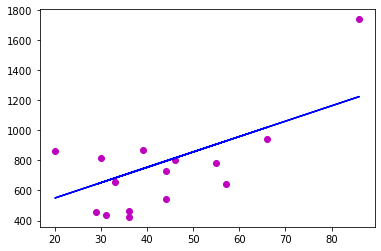

In [11]:
plt.scatter(X_test, y_test, color = 'm')
plt.plot(X_test, y_pred, color='b')
plt.show()

### Classification - KNN
- K-nearest neighbor predicts the group of a datapoint based on amjority 'votes' from nearest neighborhs
- K represents the hyperparameter which indicates how many dta points any new datapoint must listen to in order to decide what class it is in

- Performance measured by accuracy
- Accuracy = number of correct predictions / total predictions

- bullseye imagery for determing if an unknown varialbe is in one category or the other

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#already imported, but needed for this model
from sklearn.model_selection import train_test_split

In [ ]:
diabetes_df = pd.read_csv('..\Datasets\diabetes.csv')
diabetes_df.head()

In [13]:
from sklearn.linear_model import LinearRegression

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
#trying to predict outcome, isolate data of interest
#drop the outcome column and use it as the test
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [15]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#standardization - transforming values so mean is 0 SD is 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#KNN, with estimated k value of 13
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print(y_predict)

[0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0]


In [16]:
#accuracy score for this k value
print(knn.score(X_test,y_test))

0.7142857142857143


In [33]:
#create database of the test data with all columns except outcome
diabetes_pred_df = pd.DataFrame(X_test, columns=diabetes_df.columns[0:8])

#add into df, actual outcome used to test 
diabetes_pred_df['actual_outcome'] = y_test.tolist()

#add predicted outcome based on model
diabetes_pred_df['predicted_outcome'] = y_predict.tolist()

#values look strange because of standardization, it's where the age fits in a bell curve
diabetes_pred_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,actual_outcome,predicted_outcome
0,0.523387,-0.739446,-0.444600,0.720042,0.956067,0.232733,-0.152282,0.786051,0,0
1,-0.590921,-0.289349,0.329998,0.661122,-0.691043,0.433777,-1.077306,-1.059081,0,0
2,-0.590921,-0.417948,-0.171213,-1.224301,-0.691043,-0.145702,-1.044503,-1.059081,0,0
3,1.080541,-0.450098,0.557822,-1.224301,-0.691043,-0.878919,1.245094,0.031224,0,0
4,0.801964,0.482248,1.013468,-1.224301,-0.691043,-0.252136,-0.873932,1.373138,0,1
...,...,...,...,...,...,...,...,...,...,...
226,-1.148075,-0.064300,-3.087349,-1.224301,-0.691043,0.043516,-1.100267,-0.807472,1,0
227,-0.033767,-0.385798,-0.171213,1.368156,0.167188,0.327342,1.405825,-0.639733,1,0
228,-1.148075,0.192899,0.557822,0.955720,1.129447,0.504733,1.074522,-0.891341,0,0
229,0.523387,-0.514398,0.102175,0.661122,-0.101551,-0.145702,-1.162591,0.282833,0,0


### Confusion Matrix - Accuracy

In [22]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, y_predict)

array([[126,  25],
       [ 41,  39]], dtype=int64)

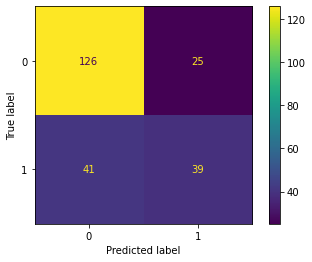

In [24]:
plot_confusion_matrix(knn, X_test, y_test)

In [42]:
#confusion matrix to accuracy?
(126+39)/(126+25+41+39)

0.7142857142857143